In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from skimage.segmentation import find_boundaries
from csbdeep.io import save_tiff_imagej_compatible
from stardist import dist_to_coord, non_maximum_suppression, polygons_to_label
from stardist import random_label_cmap, draw_polygons, sample_points
from stardist import Config, StarDist

np.random.seed(6)
lbl_cmap = random_label_cmap()

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
basedir = '/data/u934/service_imagerie/v_kapoor/StarDistData/TestData/'
basedirResultsWithoutShape = '/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithoutShapeCompletion/'
basedirResultsWithShape = '/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithShapeCompletion/'
ModelNameWithoutShape = 'PreAnnotatedStardistWithoutShapeCompletion'

BaseDirModels = 'models'

In [3]:
Path = os.path.join(basedir, '*.tif')
X = []
Names = []

filesRaw = glob.glob(Path)

for fname in filesRaw:
     x = imread(fname)
     X.append(x)
     Names.append(fname)
X.sort

SegmentedLabelsWithoutShape = [];
SegmentedLabelsWithShape = [];
axes = 'XY'
print('Total number of images to be segmented = ', len(X))
print('Image size = ', X[1].shape)
count = min(0, len(X))


        
       

Total number of images to be segmented =  3
Image size =  (512, 640)


In [4]:
model_no_sc = StarDist(None, name = ModelNameWithoutShape, basedir = BaseDirModels )

Loading network weights from 'weights_best.h5'.


In [5]:
img = normalize(X[0],1,99.8)
prob, dist = model_no_sc.predict(img)
coord = dist_to_coord(dist)
points = non_maximum_suppression(coord,prob,prob_thresh=0.2)
labels = polygons_to_label(coord,prob,points)
print('------------------')

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/data/prepare.py:284: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[crop]


------------------


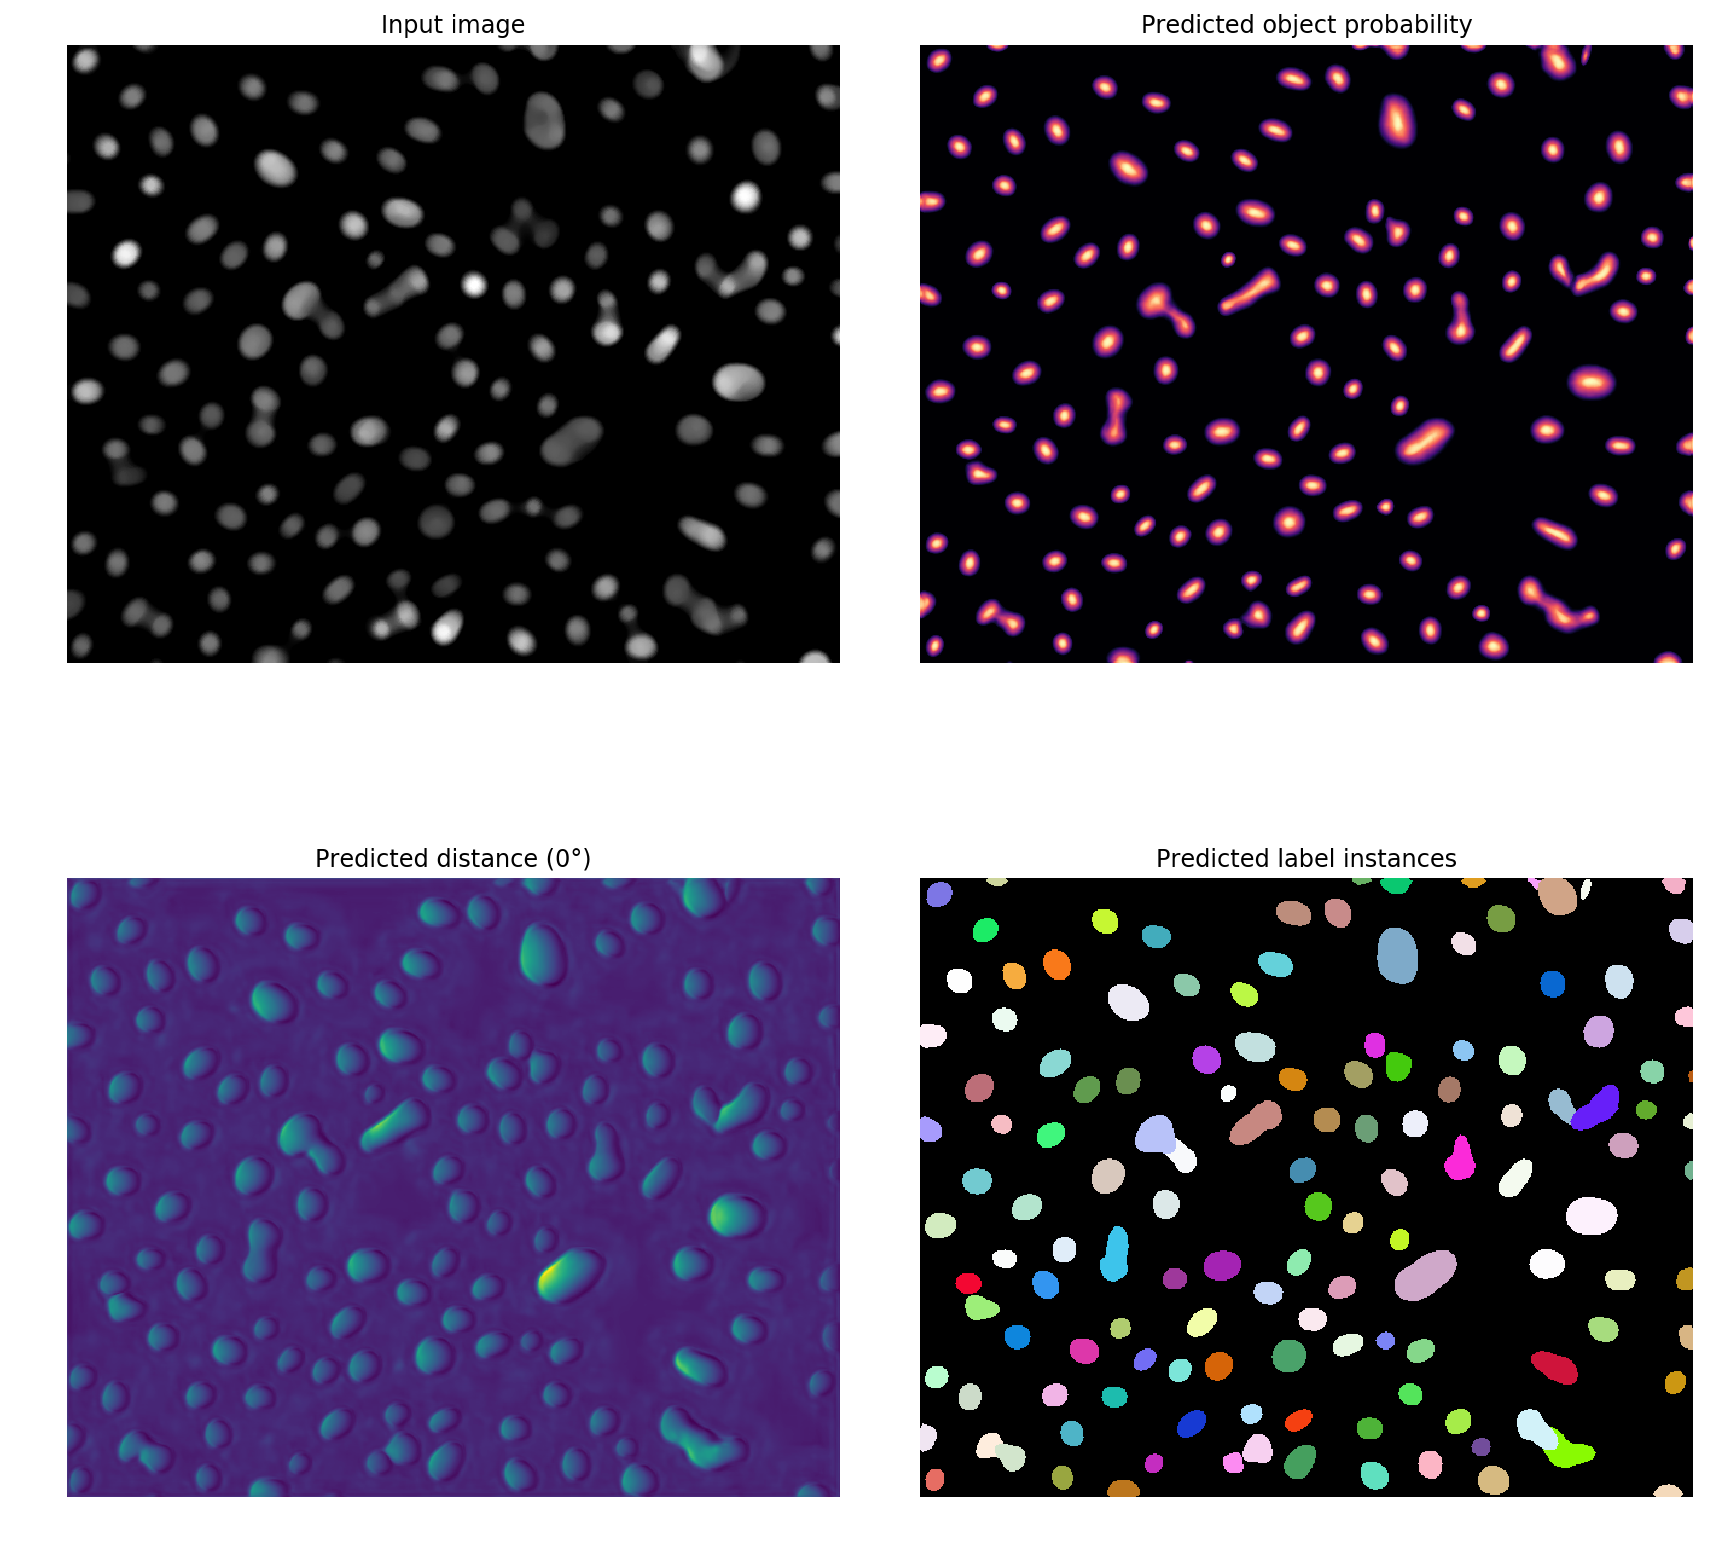

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for a,d,cm,s in zip(ax.flat, [img,prob,dist[...,0],labels], ['gray','magma','viridis',lbl_cmap],
                    ['Input image','Predicted object probability','Predicted distance (0°)','Predicted label instances']):
    a.imshow(d,cmap=cm)
    a.set_title(s)
    a.axis('off')
plt.tight_layout()
None;

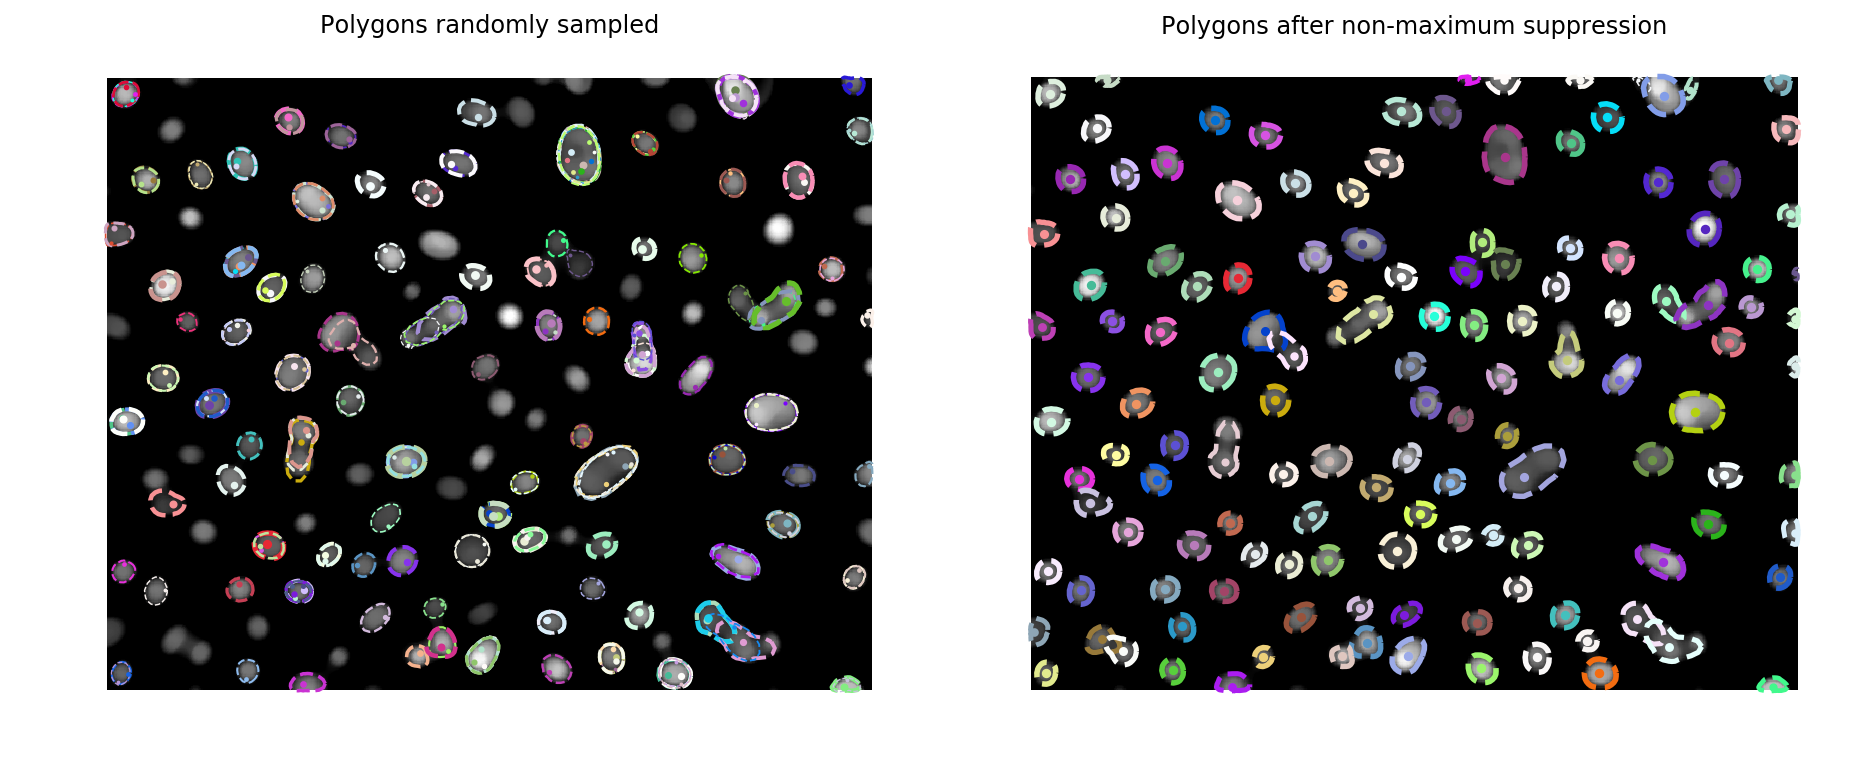

In [7]:

plt.figure(figsize=(13,12))
points_rnd = sample_points(200,prob>0.2)
plt.subplot(121); plt.imshow(img,cmap='gray'); draw_polygons(coord,prob,points_rnd,cmap=lbl_cmap)
plt.axis('off'); plt.title('Polygons randomly sampled')
plt.subplot(122); plt.imshow(img,cmap='gray'); draw_polygons(coord,prob,points,cmap=lbl_cmap)
plt.axis('off'); plt.title('Polygons after non-maximum suppression')
plt.tight_layout()

None;


In [8]:
def ApplyModelWithoutShape(model,i):
    img = normalize(X[i],1,99.8)
    prob, dist = model.predict(img)
    coord = dist_to_coord(dist)
    points = non_maximum_suppression(coord,prob,prob_thresh=0.4)
    labels = polygons_to_label(coord,prob,points)
    SegmentedLabelsWithoutShape.append(labels)
    plt.figure(figsize=(13,10))
    plt.subplot(121); plt.imshow(img,cmap='gray'); plt.axis('off')
    draw_polygons(coord,prob,points,show_dist=True)

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/data/prepare.py:284: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[crop]


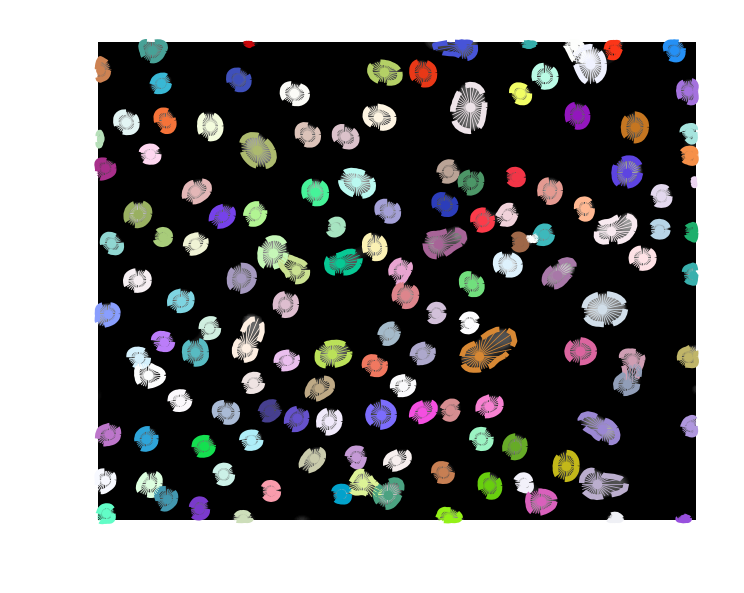

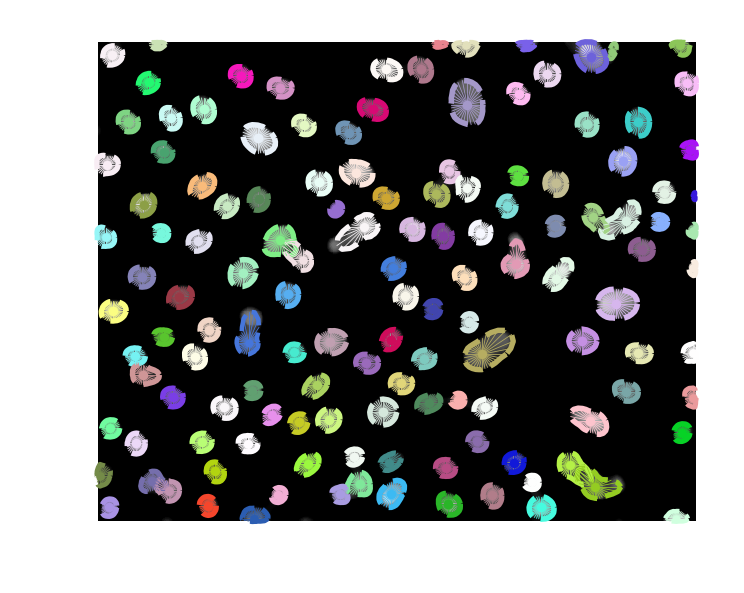

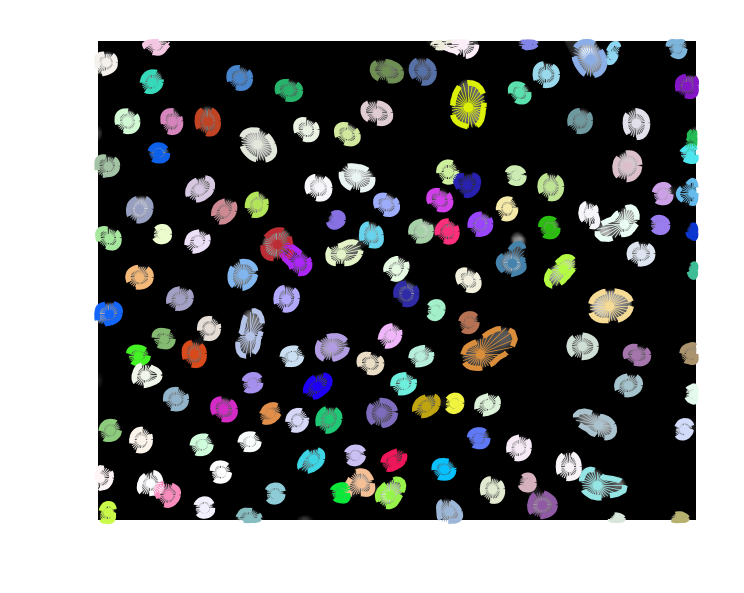

In [9]:
for i in range(0, len(X)):
       ApplyModelWithoutShape(model_no_sc,i)
      
   

In [10]:
print(basedirResultsWithoutShape)
for i in range(0, len(SegmentedLabelsWithoutShape)):
           print('Saving file'  + basedirResultsWithoutShape  + os.path.basename(Names[i]))
           save_tiff_imagej_compatible((basedirResultsWithoutShape + os.path.basename(Names[i])) , SegmentedLabelsWithoutShape[i], axes)   
             
             


/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithoutShapeCompletion/
Saving file/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithoutShapeCompletion/calibrated-P51.001.tif
Saving file/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithoutShapeCompletion/calibrated-P51.003.tif
Saving file/data/u934/service_imagerie/v_kapoor/StarDistData/JuliaResultsData/WithoutShapeCompletion/calibrated-P51.002.tif


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/utils/utils.py:209: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


Text(0.5,1,'Segmentation without Shape correction')

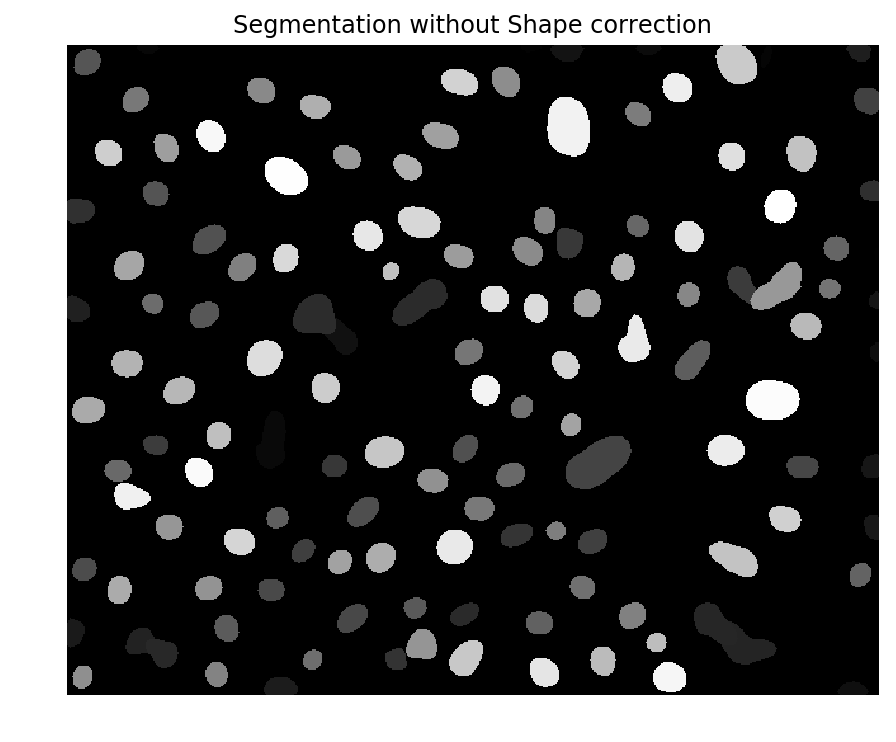

In [11]:
plt.figure(figsize = (16, 10))
plt.subplot(111); plt.imshow(X[1], cmap = 'gray'); plt.axis('off'); plt.title('Raw Image')
plt.subplot(121); plt.imshow(SegmentedLabelsWithoutShape[1], cmap = 'gray'); plt.axis('off'); plt.title('Segmentation without Shape correction')
